**PERHATIAN**

**AGAR DAPAT 'RUN ALL' FILE INI DIBUTUHKAN RAM LEBIH BESAR DARI 15 GB.**

Terima kasih🙏

Tugas Kelompok EDA yang beranggotakan: 

1. Adawia Ananda (2106724883)
2. Fernaldy (2106706464)
3. Nadia Sukesi Sianipar (2106700776)
4. Najwa Salsabila (2106726812)
5. Myra Azzahra Putri Syah Indra (2106726844)
6. Whitney (2105700946)

#1. PENDAHULUAN

1. Tuliskan masalah apa yang akan di bahas\
Jawab= Permasalahan Prediksi Penggunaan Energi Gedung dari PT Ashrae - American Society of Heating, Refrigerating and Air-Conditioning Engineers
2. Sumber data\
Jawab=https://www.ashrae.org/about ,  https://www.kaggle.com/c/ashrae-energy-prediction/data
3. Jumlah Pengukuran\
Jawab=16
4. Tipe Data\
Jawab=
 1. building_id=int 
 2. meter=int
 3. timestamp=object 
 4. meter_reading=float64
 5. site_id=int 
 6. primary_use=object 
 7. square_feet=int
 8. year_built=float
 9. floor_count=float
 10. air_temperature=float
 11. cloud_coverage=float
 12. dew_temperature=float
 13. precip_depth_1_hr=float
 14. sea_level_pressure=float
 15. wind_direction=float
 16. wind_speed=float
5. Arti atau maksud dari pengukuran-pengukuran tersebut\
Jawab = 
 1. site_id & building_id: id lokasi dan gedung
 2. primary_use: Peruntukan Gedung
 3. square_feet: Luas bangunan gedung
 4. year_built: Tahun pembuatan gedung
 5. floor_count: Banyaknya lantai yang ada di gedung.
 6. meter : Jenis meter reading penggunaan energy gedung.
 7. timestamp : Waktu saat pengukuran (per-jam)
 8. meter_reading: Penggunaan energy.
 9. air_temperature: suhu udara 
 10. cloud_coverage: ukuran berawan
 11. dew_temperature: suhu embun
 12. precip_depth_1_hr: precipitation (banyaknya air dari langit, karena sebab apapun)
 13. sea_level_pressure: Tekanan permukaan laut.
 14. wind_direction & wind_speed: arah dan kecepatan angin

#2.PRE-PROCESSING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import gc

! pip install -q kaggle

from google.colab import files
uploaded = files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! ls ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c ashrae-energy-prediction

! mkdir ashrae-energy-prediction
! unzip ashrae-energy-prediction.zip -d ashrae-energy-prediction

Saving kaggle.json to kaggle.json
kaggle.json
 99% 376M/379M [00:03<00:00, 71.8MB/s]
100% 379M/379M [00:03<00:00, 127MB/s] 
Archive:  ashrae-energy-prediction.zip
  inflating: ashrae-energy-prediction/building_metadata.csv  
  inflating: ashrae-energy-prediction/sample_submission.csv  
  inflating: ashrae-energy-prediction/test.csv  
  inflating: ashrae-energy-prediction/train.csv  
  inflating: ashrae-energy-prediction/weather_test.csv  
  inflating: ashrae-energy-prediction/weather_train.csv  


In [ ]:
building_meta = pd.read_csv('/content/ashrae-energy-prediction/building_metadata.csv')
train = pd.read_csv('/content/ashrae-energy-prediction/train.csv')
weather_train = pd.read_csv('/content/ashrae-energy-prediction/weather_train.csv')
test = pd.read_csv('/content/ashrae-energy-prediction/test.csv')
weather_test = pd.read_csv('/content/ashrae-energy-prediction/weather_test.csv')

In [ ]:
#Referensi dari https://www.kaggle.com/kernels/scriptcontent/3684066/download
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_categorical_dtype

def reduce_mem_usage(df, use_float16=False):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    #iterating over every column and finding the type of the column
    for col in df.columns:
      if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            continue
      col_type = df[col].dtype
        
        #If the columns is not object
      if col_type != object:
          #Get the minimum and maximum value
            c_min = df[col].min()
            c_max = df[col].max()
            #If the type is int
            if str(col_type)[:3] == 'int':
              #If the min max values lies with thin the range of int8 type then assign the type as int8
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
              #If the min max values lies with thin the range of int16 type then assign the type as int16 
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
              #If the min max values lies with thin the range of int32 type then assign the type as int32
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
              #If the min max values lies with thin the range of int64 type then assign the type as int64
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
              #If the min max values lies with thin the range of float16 type then assign the type as float16
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
              #If the min max values lies with thin the range of float32 type then assign the type as float32
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
      else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
building_meta = reduce_mem_usage(building_meta, use_float16=True)
train = reduce_mem_usage(train, use_float16=True)
weather_train = reduce_mem_usage(weather_train, use_float16=True)
test = reduce_mem_usage(test, use_float16=True)
weather_test = reduce_mem_usage(weather_test, use_float16=True)

Memory usage of dataframe is 0.07 MB
Memory usage after optimization is: 0.02 MB
Decreased by 73.9%
Memory usage of dataframe is 616.95 MB
Memory usage after optimization is: 173.84 MB
Decreased by 71.8%
Memory usage of dataframe is 9.60 MB
Memory usage after optimization is: 2.59 MB
Decreased by 73.1%
Memory usage of dataframe is 1272.51 MB
Memory usage after optimization is: 358.53 MB
Decreased by 71.8%
Memory usage of dataframe is 19.04 MB
Memory usage after optimization is: 5.13 MB
Decreased by 73.0%


In [ ]:
building_meta

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [ ]:
train

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000000
1,1,0,2016-01-01 00:00:00,0.000000
2,2,0,2016-01-01 00:00:00,0.000000
3,3,0,2016-01-01 00:00:00,0.000000
4,4,0,2016-01-01 00:00:00,0.000000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750000
20216096,1445,0,2016-12-31 23:00:00,4.825000
20216097,1446,0,2016-12-31 23:00:00,0.000000
20216098,1447,0,2016-12-31 23:00:00,159.574997


In [ ]:
weather_train

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.000000,6.0,20.000000,NaN,1019.5,0.0,0.000000
1,0,2016-01-01 01:00:00,24.406250,NaN,21.093750,-1.0,1020.0,70.0,1.500000
2,0,2016-01-01 02:00:00,22.796875,2.0,21.093750,0.0,1020.0,0.0,0.000000
3,0,2016-01-01 03:00:00,21.093750,2.0,20.593750,0.0,1020.0,0.0,0.000000
4,0,2016-01-01 04:00:00,20.000000,2.0,20.000000,-1.0,1020.0,250.0,2.599609
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.000000,NaN,-8.000000,NaN,NaN,180.0,5.699219
139769,15,2016-12-31 20:00:00,2.800781,2.0,-8.898438,NaN,1007.5,180.0,7.699219
139770,15,2016-12-31 21:00:00,2.800781,NaN,-7.199219,NaN,1007.5,180.0,5.101562
139771,15,2016-12-31 22:00:00,2.199219,NaN,-6.699219,NaN,1008.0,170.0,4.601562


In [ ]:
test

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00
...,...,...,...,...
41697595,41697595,1444,0,2018-05-09 07:00:00
41697596,41697596,1445,0,2018-05-09 07:00:00
41697597,41697597,1446,0,2018-05-09 07:00:00
41697598,41697598,1447,0,2018-05-09 07:00:00


In [ ]:
weather_test

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
1,0,2017-01-01 01:00:00,17.796875,2.0,12.796875,0.0,1022.0,130.0,3.099609
2,0,2017-01-01 02:00:00,16.093750,0.0,12.796875,0.0,1022.0,140.0,3.099609
3,0,2017-01-01 03:00:00,17.203125,0.0,13.296875,0.0,1022.0,140.0,3.099609
4,0,2017-01-01 04:00:00,16.703125,2.0,13.296875,0.0,1022.5,130.0,2.599609
...,...,...,...,...,...,...,...,...,...
277238,15,2018-12-31 19:00:00,3.300781,NaN,1.700195,NaN,1018.5,150.0,7.699219
277239,15,2018-12-31 20:00:00,2.800781,NaN,1.099609,NaN,1018.0,140.0,5.101562
277240,15,2018-12-31 21:00:00,2.800781,NaN,1.700195,-1.0,1017.0,140.0,6.199219
277241,15,2018-12-31 22:00:00,2.800781,NaN,2.199219,8.0,1016.0,140.0,5.101562


#A. Pre-processing data pertama yaitu **Data Integration** dengan menggabungkan database building_metadata,train,weather_train menjadi 1 data besar.# 

In [ ]:
#Melakukan join pada train
join1=pd.merge(building_meta,train,on='building_id')
join2=pd.merge(weather_train,building_meta,on='site_id')
join=pd.concat([join1,join2])
join

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,Education,7432,2008.0,NaN,0.0,2016-01-01 00:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,Education,7432,2008.0,NaN,0.0,2016-01-01 01:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,Education,7432,2008.0,NaN,0.0,2016-01-01 02:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,Education,7432,2008.0,NaN,0.0,2016-01-01 03:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,Education,7432,2008.0,NaN,0.0,2016-01-01 04:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12676161,15,1444,Entertainment/public assembly,19619,1914.0,NaN,NaN,2016-12-31 23:00:00,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
12676162,15,1445,Education,4298,NaN,NaN,NaN,2016-12-31 23:00:00,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
12676163,15,1446,Entertainment/public assembly,11265,1997.0,NaN,NaN,2016-12-31 23:00:00,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
12676164,15,1447,Lodging/residential,29775,2001.0,NaN,NaN,2016-12-31 23:00:00,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875


In [ ]:
#Melakukan join pada train
jointest1=pd.merge(building_meta,test,on='building_id')
jointest2=pd.merge(weather_test,building_meta,on='site_id')
jointest=pd.concat([jointest1,jointest2])
jointest

,site_id,building_id,primary_use,square_feet,year_built,floor_count,row_id,meter,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,Education,7432,2008.0,NaN,0.0,0.0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,Education,7432,2008.0,NaN,129.0,0.0,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,Education,7432,2008.0,NaN,258.0,0.0,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,Education,7432,2008.0,NaN,387.0,0.0,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,Education,7432,2008.0,NaN,516.0,0.0,2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25273981,15,1444,Entertainment/public assembly,19619,1914.0,NaN,NaN,NaN,2018-12-31 23:00:00,3.300781,NaN,2.199219,20.0,1014.5,140.0,5.101562
25273982,15,1445,Education,4298,NaN,NaN,NaN,NaN,2018-12-31 23:00:00,3.300781,NaN,2.199219,20.0,1014.5,140.0,5.101562
25273983,15,1446,Entertainment/public assembly,11265,1997.0,NaN,NaN,NaN,2018-12-31 23:00:00,3.300781,NaN,2.199219,20.0,1014.5,140.0,5.101562
25273984,15,1447,Lodging/residential,29775,2001.0,NaN,NaN,NaN,2018-12-31 23:00:00,3.300781,NaN,2.199219,20.0,1014.5,140.0,5.101562


#B. Pre-processing data selanjutnya adalah **Cleaning Data** pada tabel TRAIN#

Akan melalui beberapa tahap yaitu: 
1. Mengoreksi Tipe Variabel
2. Menelusuri Statistika Deskriptif
3. Fixing Variabel Type => yaitu memangkas kolom menjadi kolom yang kita butuhkan saja untuk dilakukan analisis lebih lanjut
4. Removing duplicate data
5. Menentukan outlier
6. Remove Outlier ke variabel baru
7. Melihat missing value dan membuat keputusan apakah missing value akan di isi dengan mean,modus,median atau justru membiarkan missing value tersebut. 


**1. Mengoreksi Tipe variabel**

In [ ]:
#Selanjutnya,kita lihat dulu info yang disajikan
pd.DataFrame.info(join)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32892266 entries, 0 to 12676165
Data columns (total 16 columns):
 #   Column              Dtype   
---  ------              -----   
 0   site_id             int8    
 1   building_id         int16   
 2   primary_use         category
 3   square_feet         int32   
 4   year_built          float16 
 5   floor_count         float16 
 6   meter               float64 
 7   timestamp           category
 8   meter_reading       float32 
 9   air_temperature     float16 
 10  cloud_coverage      float16 
 11  dew_temperature     float16 
 12  precip_depth_1_hr   float16 
 13  sea_level_pressure  float16 
 14  wind_direction      float16 
 15  wind_speed          float16 
dtypes: category(2), float16(9), float32(1), float64(1), int16(1), int32(1), int8(1)
memory usage: 1.5 GB


In [ ]:
# tipe data di setiap kolom
# Wajib di periksa apakah tipe datanya sudah tepat?
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32892266 entries, 0 to 12676165
Data columns (total 16 columns):
 #   Column              Dtype   
---  ------              -----   
 0   site_id             int8    
 1   building_id         int16   
 2   primary_use         category
 3   square_feet         int32   
 4   year_built          float16 
 5   floor_count         float16 
 6   meter               float64 
 7   timestamp           category
 8   meter_reading       float32 
 9   air_temperature     float16 
 10  cloud_coverage      float16 
 11  dew_temperature     float16 
 12  precip_depth_1_hr   float16 
 13  sea_level_pressure  float16 
 14  wind_direction      float16 
 15  wind_speed          float16 
dtypes: category(2), float16(9), float32(1), float64(1), int16(1), int32(1), int8(1)
memory usage: 1.5 GB


Tipe data sudah sesuai

**2. Statistika Deskriptif**

# <center><font color="blue"> Beberapa Catatan Statistika Deskriptif</font></center>

* Modus tidak selalu ada
* Kapan saat yang lebih tepat menggunakan Mean atau Median (outlier-wise)
* Min/max dapat digunakan untuk mendeteksi Noise/Outlier
* Perbedaan noise dan outlier hanya dapat dilakukan lewat domain/business knowledge.
* Banyak literatur yang menyatakan outlier sebagai noise (outlier adalah subset/contoh noise).
* Outlier/noise harus "ditangani" saat preprocessing.
    
<center><img alt="" src="images/outlier vs noise.jpg" style="height: 400px;"/></center>

In [ ]:
join.describe(include='all')

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,3.289227e+07,3.289227e+07,32892266,3.289227e+07,13973882.0,6618639.0,2.021610e+07,32892266,2.021610e+07,1.267214e+07,7055022.0,1.267024e+07,9994336.0,11687011.0,12014216.0,1.265129e+07
unique,NaN,NaN,16,NaN,NaN,NaN,NaN,8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Education,NaN,NaN,NaN,NaN,2016-12-27 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,12965865,NaN,NaN,NaN,NaN,3819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.581502e+00,7.694347e+02,NaN,1.017398e+05,NaN,NaN,6.624412e-01,NaN,2.042377e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.083742e+00,4.249266e+02,NaN,1.149868e+05,NaN,0.0,9.309921e-01,NaN,1.532176e+05,0.000000e+00,0.0,0.000000e+00,NaN,NaN,NaN,0.000000e+00
min,0.000000e+00,0.000000e+00,NaN,2.830000e+02,1900.0,1.0,0.000000e+00,NaN,0.000000e+00,-2.890625e+01,0.0,-3.500000e+01,-1.0,968.0,0.0,0.000000e+00
25%,3.000000e+00,3.770000e+02,NaN,2.799500e+04,1951.0,1.0,0.000000e+00,NaN,1.830000e+01,8.898438e+00,0.0,1.099609e+00,0.0,1012.0,80.0,2.099609e+00
50%,8.000000e+00,8.210000e+02,NaN,6.640400e+04,1970.0,3.0,0.000000e+00,NaN,7.877500e+01,1.609375e+01,2.0,9.398438e+00,0.0,1016.5,180.0,3.099609e+00
75%,1.300000e+01,1.150000e+03,NaN,1.305770e+05,1994.0,6.0,1.000000e+00,NaN,2.679840e+02,2.390625e+01,4.0,1.609375e+01,0.0,1021.0,280.0,4.601562e+00


**3. Fixing Variable Type(s)**

In [ ]:
#Memangkas kolom yang tidak akan dilakukan analisis
join.drop(join.columns[[7,10,11,12,13,14,15]],axis=1,inplace=True)
join.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,meter_reading,air_temperature
0,0,0,Education,7432,2008.0,NaN,0.0,0.0,NaN
1,0,0,Education,7432,2008.0,NaN,0.0,0.0,NaN
2,0,0,Education,7432,2008.0,NaN,0.0,0.0,NaN
3,0,0,Education,7432,2008.0,NaN,0.0,0.0,NaN
4,0,0,Education,7432,2008.0,NaN,0.0,0.0,NaN


**4. Removing Duplicate Data**

In [ ]:
#Mencari tahu berapa banyak data yang duplikat
join.duplicated().sum()
#Terlihat terdapat data yang duplikat. Kita akan membuang data ini

24589426

In [ ]:
join.drop_duplicates(keep="first", inplace=True)
print(join.shape)
print("jumlah data yang duplikat", join.duplicated().sum())
#Data berhasil di bersihkan dari data duplikat

(8302840, 9)
jumlah data yang duplikat 0


**5. Menentukan Outliers**


In [ ]:
#MENCARI NILAI MAX
join.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


site_id            1.500000e+01
building_id        1.448000e+03
square_feet        8.750000e+05
year_built         2.017000e+03
floor_count        2.600000e+01
meter              3.000000e+00
meter_reading      2.190470e+07
air_temperature    4.718750e+01
dtype: float64

In [ ]:
#MENCARI NILAI MIN
join.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


site_id               0.00000
building_id           0.00000
square_feet         283.00000
year_built         1900.00000
floor_count           1.00000
meter                 0.00000
meter_reading         0.00000
air_temperature     -28.90625
dtype: float64

In [ ]:
#MENCARI MEAN
join.mean()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


site_id                 8.835581
building_id           863.827343
square_feet        123135.530473
year_built                   NaN
floor_count                  NaN
meter                   0.667881
meter_reading        4587.591797
air_temperature              NaN
dtype: float64

**Terlihat terdapat outlier pada square_feet dan meter_reading karena nilai min dan max nya sangat jauh dari nilai rata-rata**

**6. Remove Outliers ke variabel baru**

AKAN DI TAMPILKAN GRAFIK OUTLIER SEBELUM DAN SESUDAH OUTLIER DI REMOVE KE VARIABEL BARU.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


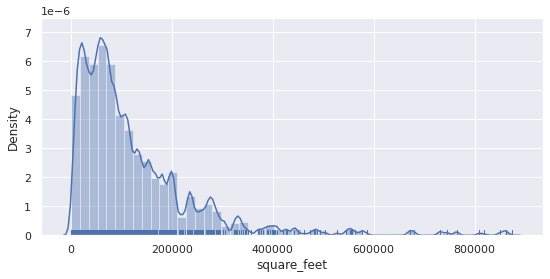

In [ ]:
#GRAFIK OUTLIER SEBELUM OUTLIER DIREMOVE KE VARIABEL BARU (SQUARE_FEET)
#Melihat data outlier yang terdapat pada variabel "square_feet"
plt.style.use('bmh'); sns.set() #style visualisasi
fig, axes = plt.subplots(1, 1, figsize=(9, 4))
p = sns.distplot(join['square_feet'], kde=True, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


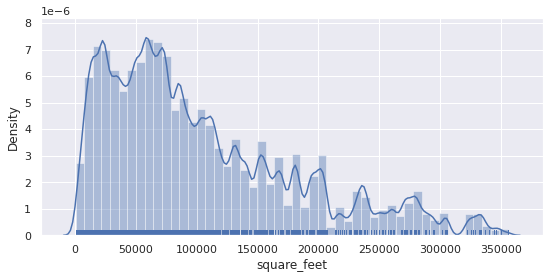

In [ ]:
#GRAFIK OUTLIER SESUDAH OUTLIER DIREMOVE KE VARIABEL BARU(SQUARE_FEET)
#Data square_feet tanpa outlier (remove outlier) tetapi di simpan di variabel baru
# Misal dengan asumsi data berdistribusi normal & menggunakan 95% confidence interval di sekitar variabel "square_feet"
normal_data = abs(join.square_feet - join.square_feet.mean())<=(2*join.square_feet.std()) 
join2 = join[normal_data]
fig, axes = plt.subplots(1, 1, figsize=(9, 4))
p = sns.distplot(join2['square_feet'], kde=True, rug=True)
# Perhatikan disini sengaja data yang telah di remove outliernya disimpan dalam variabel baru "join2"

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


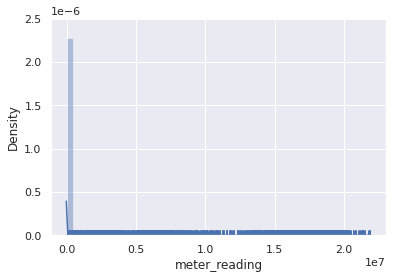

In [ ]:
#GRAFIK OUTLIER SEBELUM OUTLIER DIREMOVE KE VARIABEL BARU(METER_READING)
#Melihat data oulier yang terdapat pada variabel "meter_reading"
plt.style.use('bmh'); sns.set() #style visualisasi

p = sns.distplot(join['meter_reading'], kde=True, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


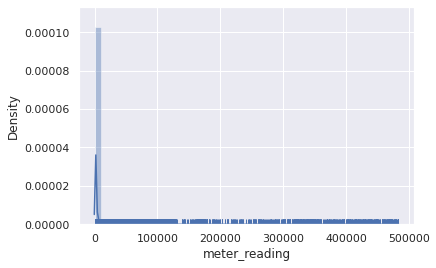

In [ ]:
#GRAFIK OUTLIER SETELAH OUTLIER DIREMOVE KE VARIABEL BARU(METER_READING)
#Data meter_reading tanpa outlier (remove) tetapi di simpan di variabel baru
# Misal dengan asumsi data berdistribusi normal & menggunakan 95% confidence interval di sekitar variabel "meter_reading"
normal_data4 = abs(join.meter_reading - join.meter_reading.mean())<=(2*join.meter_reading.std()) # mu-2s<x<mu+2s
join5 = join[normal_data4]
p = sns.distplot(join5['meter_reading'], kde=True, rug=True)
# Perhatikan disini sengaja data yang telah di remove outliernya disimpan dalam variabel baru "join5"

**7.Menemukan Missing Value**

In [ ]:
#Setelah nya kita mencari tau jumlah missing value tiap variabel
join.isna().sum()

site_id                  0
building_id              0
primary_use              0
square_feet              0
year_built         4810785
floor_count        7413705
meter               160287
meter_reading       160287
air_temperature    8143731
dtype: int64

In [ ]:
#Mencari persentase missing value
(join.isnull().sum()/len(join)).to_frame('persentase missing')

,persentase missing
site_id,0.000000
building_id,0.000000
primary_use,0.000000
square_feet,0.000000
year_built,0.579414
floor_count,0.892912
meter,0.019305
meter_reading,0.019305
air_temperature,0.980837


**Dikarenakan persentase missing value dari 3 subjek di atas masih di atas 10%. Maka kelompok kami memutuskan untuk tidak mengganti nilai missing value.**

#C. Pre-processing Data selanjutnya adalah **Saving (preprocessed) Data**

In [ ]:
# Saving the preprocessed Data for future use/analysis
join.to_csv("join.csv", encoding='utf8', index=False)

# **VISUALISASI DATA**

Berikut akan ditampilkan beberapa visualisasi data sederhana

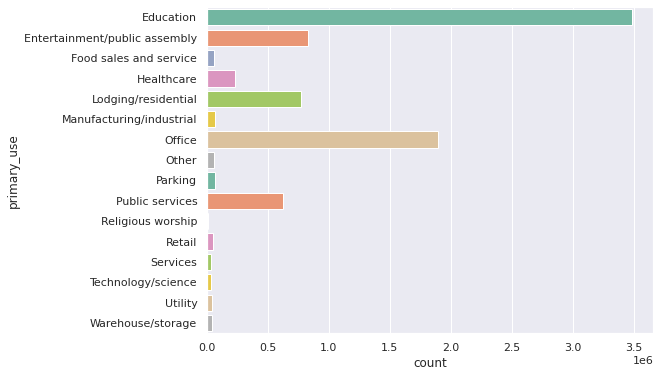

In [ ]:
#Visualisasi apa saja kegunaan gedung di lingkungan tersebut.
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(y = join.primary_use, palette = 'Set2')

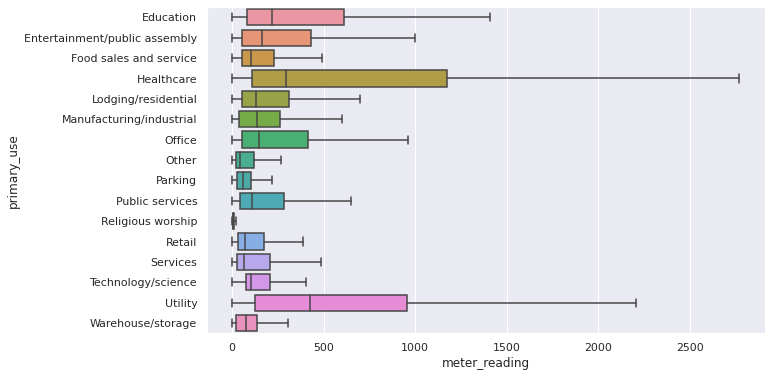

In [ ]:
#Visualisasi hubungan meter_reading dengan primary_use
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
sns.boxplot(x = 'meter_reading', y = 'primary_use', data = join, showfliers = False)

Dari visualisasi di atas, dapat dilihat bahwa sektor Healthcare dan Utility menggunakan energi terbanyak, sementara sektor Religious Worship menggunakan energi paling sedikit

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram Square_Feet')

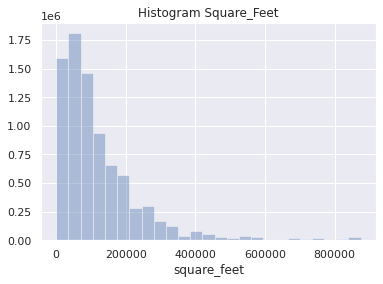

In [ ]:
#Histogram dari square_feet
sns.distplot(join.square_feet, bins=25, hist=True,kde=False, rug=False ).set_title("Histogram Square_Feet")

Dari visualisasi di atas, dapat dilihat bahwa mayoritas gedung memiliki luas kurang dari 200000 square feet

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram Year Built')

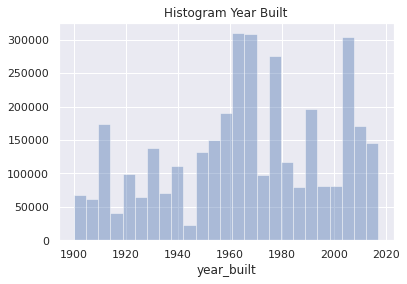

In [ ]:
#Histogram dari year_built
sns.distplot(join.year_built, bins=25, hist=True,kde=False, rug=False ).set_title("Histogram Year Built")

Dari visualisasi di atas, dapat dilihat bahwa bangunan paling banyak dibangun pada range tahun 1960-1970.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram Air Temperature')

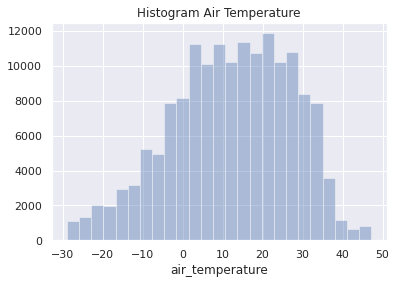

In [ ]:
#Histogram dari air_temperature
sns.distplot(join.air_temperature, bins=25, hist=True,kde=False, rug=False ).set_title("Histogram Air Temperature")

Dari visualisasi di atas, dapat dilihat bahwa mayoritas gedung memiliki suhu udara 0 sampai 30 derajat celsius

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram Floor Count')

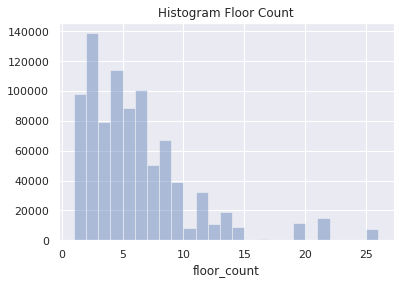

In [ ]:
#Histogram floor_count
sns.distplot(join.floor_count, bins=25, hist=True,kde=False, rug=False ).set_title("Histogram Floor Count")

Dari visualisasi di atas, dapat dilihat bahwa mayoritas gedung memiliki jumlah lantai 1 sampai 5

In [ ]:
join.corr()

#NaN=Tidak ada korelasi

,site_id,building_id,square_feet,year_built,floor_count,meter,meter_reading,air_temperature
site_id,1.000000,0.983414,0.023151,-0.155731,-0.228668,0.379930,0.014075,-0.277513
building_id,0.983414,1.000000,0.028087,-0.182125,-0.217098,0.380541,0.009930,-0.275911
square_feet,0.023151,0.028087,1.000000,0.146858,0.564485,0.029967,0.031280,-0.073478
year_built,-0.155731,-0.182125,0.146858,1.000000,0.246295,-0.078951,0.069819,0.092763
floor_count,-0.228668,-0.217098,0.564485,0.246295,1.000000,0.105812,0.071609,-0.139093
meter,0.379930,0.380541,0.029967,-0.078951,0.105812,1.000000,0.027716,NaN
meter_reading,0.014075,0.009930,0.031280,0.069819,0.071609,0.027716,1.000000,NaN
air_temperature,-0.277513,-0.275911,-0.073478,0.092763,-0.139093,NaN,NaN,1.000000


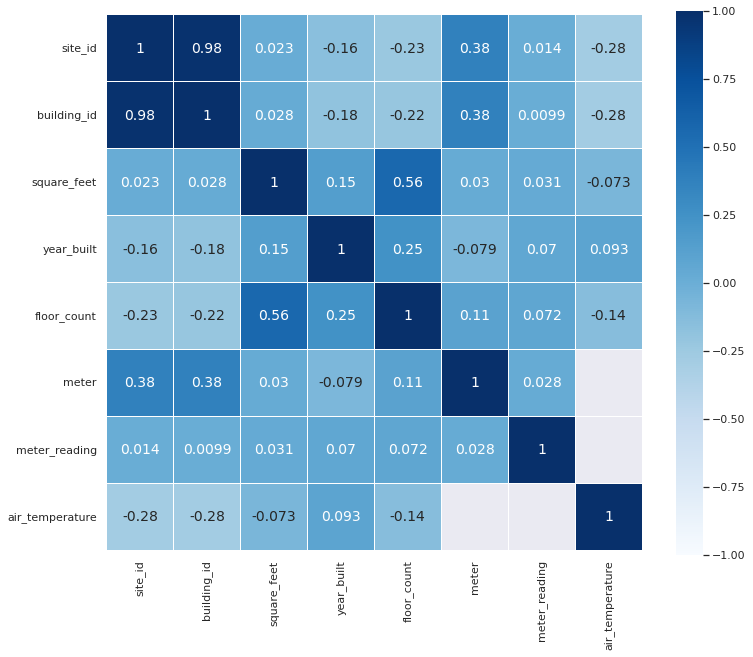

In [ ]:
corr = join.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= 0.4)], 
            cmap='Blues', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

Dari dua visualisasi di atas, dapat dilihat bahwa korelasi antara energi yang digunakan (meter_reading) dengan variabel-variabel lainnya cenderung rendah, yaitu -0.2<r<0.2

#3.ANALISIS DASAR STATISTIKA

Analisis yang akan dilakukan yaitu:
1. Mencari nilai minimum year_built untuk mengetahui bangunan dengan building_id mana dan site_id mana yang paling lama berdiri dan menghabiskan energi dalam jangka waktu yang lama. Selanjutnya mencari meter_reading dari bangunan id yang di dapatkan dan melihat primary_use untuk mengetahui kegunaan dari penggunaan energi yang banyak di PT tersebut. Analisis ini digunakan untuk mengetahui korelasi waktu dengan besar penggunaan energi.

2. Mencari nilai maksimum square_feet untuk mengetahui bangunan dengan building_id mana dan site_id mana yang paling luas.Selanjutnya mencari meter_reading dari bangunan id yang di dapatkan dan melihat primary_use untuk mengetahui kegunaan dari penggunaan energi yang banyak di PT tersebut. Analisis ini digunakan untuk mengetahui korelasi luas bangunan dengan besar penggunaan energi.

3. Mencari nilai maksimum floor_count untuk mengetahui bangunan dengan building_id mana dan site_id mana yang paling banyak jumlah lantai nya. Selanjutnya mencari meter_reading dari bangunan id yang di dapatkan dan melihat primary_use untuk mengetahui kegunaan dari penggunaan energi yang banyak di PT tersebut. Analisis ini digunakan untuk mengetahui korelasi jumlah lantai dengan besar penggunaan energi.

4. Mencari nilai minimum dan maksimum air_temperature untuk mengetahui bangunan dengan building_id mana dan site_id mana yang paling tinggi dan paling rendah suhu nya. Selanjutnya mencari meter_reading dari bangunan id yang di dapatkan dan melihat primary_use untuk mengetahui kegunaan dari penggunaan energi yang banyak di PT tersebut. Analisis ini digunakan untuk mengetahui korelasi suhu udara dengan besar penggunaan energi.

5. Mencari nilai maksimum meter_reading untuk mengetahui bangunan dengan building_id mana dan site_id mana yang sebenarnya(pada fakta nya) menghabiskan energi paling banyak.

6. Membandingkan semua hasil pada poin 1,2,3,4 terhadap poin 5.

6. Tarik kesimpulan. 

**1. Analisis Year_built**

In [ ]:
#Mencari nilai min dari masing-masing kolom
join.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


site_id               0.00000
building_id           0.00000
square_feet         283.00000
year_built         1900.00000
floor_count           1.00000
meter                 0.00000
meter_reading         0.00000
air_temperature     -28.90625
dtype: float64

Terlihat bahwa nilai minimum dari year_built yaitu 1900. Artinya bangunan terlama di bangun sejak pada tahun 1900.

In [ ]:
join[join['year_built']<1901].head(10)  

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,meter_reading,air_temperature
1313803,1,124,Education,38319,1900.0,6.0,0.0,9.300000,NaN
1313804,1,124,Education,38319,1900.0,6.0,0.0,17.900000,NaN
1313805,1,124,Education,38319,1900.0,6.0,0.0,18.299999,NaN
1313807,1,124,Education,38319,1900.0,6.0,0.0,16.600000,NaN
1313808,1,124,Education,38319,1900.0,6.0,0.0,15.400000,NaN
1313809,1,124,Education,38319,1900.0,6.0,0.0,17.000000,NaN
1313810,1,124,Education,38319,1900.0,6.0,0.0,16.100000,NaN
1313811,1,124,Education,38319,1900.0,6.0,0.0,38.200001,NaN
1313812,1,124,Education,38319,1900.0,6.0,0.0,41.799999,NaN
1313814,1,124,Education,38319,1900.0,6.0,0.0,43.700001,NaN


Dari tabel 10 nilai teratas di atas,dapat dilihat bahwa building dengan **building_id 124 dan site_id 1** memiliki tahun berdiri paling lama yaitu sejak 1900. Dan semuanya digunakan untuk keperluan education. 

**2. Analisis square_feet**

In [ ]:
#Mencari nilai max dari square_feet untuk mengetahui luas maximal bangunan
join.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


site_id            1.500000e+01
building_id        1.448000e+03
square_feet        8.750000e+05
year_built         2.017000e+03
floor_count        2.600000e+01
meter              3.000000e+00
meter_reading      2.190470e+07
air_temperature    4.718750e+01
dtype: float64

Terlihat bahwa luas bangunan paling maksimal adalah **875000**

In [ ]:
join[join['square_feet']>874999].head(10)

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,meter_reading,air_temperature
9621820,8,869,Entertainment/public assembly,875000,NaN,1.0,0.0,1517.040039,NaN
9621844,8,869,Entertainment/public assembly,875000,NaN,1.0,0.0,1400.380005,NaN
9621868,8,869,Entertainment/public assembly,875000,NaN,1.0,0.0,1417.040039,NaN
9621892,8,869,Entertainment/public assembly,875000,NaN,1.0,0.0,1800.380005,NaN
9621916,8,869,Entertainment/public assembly,875000,NaN,1.0,0.0,1017.039978,NaN
9621940,8,869,Entertainment/public assembly,875000,NaN,1.0,0.0,1350.380005,NaN
9621964,8,869,Entertainment/public assembly,875000,NaN,1.0,0.0,1833.670044,NaN
9621988,8,869,Entertainment/public assembly,875000,NaN,1.0,0.0,1583.709961,NaN
9622012,8,869,Entertainment/public assembly,875000,NaN,1.0,0.0,1500.380005,NaN
9622036,8,869,Entertainment/public assembly,875000,NaN,1.0,0.0,916.666992,NaN


Dari tabel 10 nilai teratas di atas,dapat dilihat bahwa building dengan **building_id 869 dan site_id 8** memiliki luas paling besar dan semuanya digunakan untuk keperluan entertainment/public assembly. 

**3. Analisis floor_count**

In [ ]:
#Mencari nilai max dari floor_count untuk mengetahui jumlah lantai maksimal bangunan
join.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


site_id            1.500000e+01
building_id        1.448000e+03
square_feet        8.750000e+05
year_built         2.017000e+03
floor_count        2.600000e+01
meter              3.000000e+00
meter_reading      2.190470e+07
air_temperature    4.718750e+01
dtype: float64

In [ ]:
join[join['floor_count']>25].head(10)

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,meter_reading,air_temperature
8962663,7,799,Education,527431,1976.0,26.0,0.0,0.000000,NaN
8962664,7,799,Education,527431,1976.0,26.0,1.0,0.000000,NaN
8962665,7,799,Education,527431,1976.0,26.0,2.0,1562.770020,NaN
8962668,7,799,Education,527431,1976.0,26.0,2.0,1709.020020,NaN
8962671,7,799,Education,527431,1976.0,26.0,2.0,1620.380005,NaN
8962674,7,799,Education,527431,1976.0,26.0,2.0,1667.050049,NaN
8962677,7,799,Education,527431,1976.0,26.0,2.0,1501.939941,NaN
8962680,7,799,Education,527431,1976.0,26.0,2.0,2741.719971,NaN
8962683,7,799,Education,527431,1976.0,26.0,2.0,3758.889893,NaN
8962686,7,799,Education,527431,1976.0,26.0,2.0,3658.250000,NaN


Dari tabel 10 nilai teratas di atas,dapat dilihat bahwa building dengan **building_id 799 dan site_id 7** memiliki jumlah lantai paling besar dan semuanya digunakan untuk keperluan education. 

**4. Analisis air_temperature**

In [ ]:
#Mencari nilai max dari air_temperature untuk mengetahui suhu udara paling maksimal
join.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


site_id            1.500000e+01
building_id        1.448000e+03
square_feet        8.750000e+05
year_built         2.017000e+03
floor_count        2.600000e+01
meter              3.000000e+00
meter_reading      2.190470e+07
air_temperature    4.718750e+01
dtype: float64

Terlihat bahwa suhu udara paling maksimal adalah 47.2 derajat celcius.

In [ ]:
join[join['air_temperature']>47].head(1)

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,meter_reading,air_temperature
1923003,2,156,Public services,43681,2007.0,NaN,NaN,NaN,47.1875


Dari tabel nilai teratas pertama di atas,dapat dilihat bahwa building dengan **building_id 156 dan site_id 2** memiliki suhu udara paling tinggi dan digunakan untuk keperluan public services. 

In [ ]:
#Mencari nilai min dari air_temperature untuk mengetahui suhu udara paling rendah
join.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


site_id               0.00000
building_id           0.00000
square_feet         283.00000
year_built         1900.00000
floor_count           1.00000
meter                 0.00000
meter_reading         0.00000
air_temperature     -28.90625
dtype: float64

Terlihat bahwa suhu paling rendah adalah **-28.9 derajat celcius**

In [ ]:
join[join['air_temperature']<-28.8].head(1)

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,meter_reading,air_temperature
10683182,13,1069,Office,20864,NaN,NaN,NaN,NaN,-28.90625


Dari tabel nilai teratas pertama di atas,dapat dilihat bahwa building dengan **building_id 1069 dan site_id 13** memiliki suhu udara paling rendah dan digunakan untuk keperluan office. 

**5.Mencari bangunan yang sebenarnya menggunakan energi paling besar**

In [ ]:
#2. Mencari nilai max dari meter_reading
join.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


site_id            1.500000e+01
building_id        1.448000e+03
square_feet        8.750000e+05
year_built         2.017000e+03
floor_count        2.600000e+01
meter              3.000000e+00
meter_reading      2.190470e+07
air_temperature    4.718750e+01
dtype: float64

Dari hasil di atas di dapat bahwa penggunaan energi paling maksimum(meter_reading) dihasilkan sebesar **2190470**

In [ ]:
join[join['meter_reading']>2190469].head(10) 

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,meter_reading,air_temperature
13749500,13,1099,Education,332884,NaN,NaN,2.0,3241630.0,NaN
13749518,13,1099,Education,332884,NaN,NaN,2.0,3554740.0,NaN
13749520,13,1099,Education,332884,NaN,NaN,2.0,3341210.0,NaN
13749522,13,1099,Education,332884,NaN,NaN,2.0,2695780.0,NaN
13749524,13,1099,Education,332884,NaN,NaN,2.0,2608420.0,NaN
13749526,13,1099,Education,332884,NaN,NaN,2.0,2583650.0,NaN
13749528,13,1099,Education,332884,NaN,NaN,2.0,2670430.0,NaN
13749530,13,1099,Education,332884,NaN,NaN,2.0,2769430.0,NaN
13749532,13,1099,Education,332884,NaN,NaN,2.0,3009500.0,NaN
13749534,13,1099,Education,332884,NaN,NaN,2.0,2379820.0,NaN


Dari hasil tabel penggunaan energi maksimum yang sebenarnya di atas terlihat bahwa pada faktanya gedung yang menghabiskan energi paling banyak sebesar 2190470 yaitu gedung dengan **building_id 1099 dan site_id 13** dan digunakan untuk Education.

**6. Kesimpulan**

1. Dari hasil tabel penggunaan energi maksimum yang sebenarnya terlihat bahwa pada faktanya gedung yang menghabiskan energi paling banyak sebesar **2190470** yaitu gedung dengan **building_id 1099 dan site_id 13** .Hasil ini berbeda dengan gedung yang menghabiskan energi terbanyak berdasarkan year_built yaitu **building_id 124 dan site_id 1**. Hal ini menunjukkan bangunan paling lama tidak menjamin bangunan itu akan menggunakan energi paling besar. Tidak ada korelasi terhadap waktu secara signifikan. Namun dapat dilihat,primary_use kedua hasil itu sama yaitu sama-sama digunakan untuk keperluan pendidikan.

2. Dari hasil tabel penggunaan energi maksimum yang sebenarnya terlihat bahwa pada faktanya gedung yang menghabiskan energi paling banyak sebesar **2190470** yaitu gedung dengan **building_id 1099 dan site_id 13** .Hasil ini berbeda dengan gedung yang menghabiskan energi terbanyak berdasarkan square_feet yaitu **building_id 869 dan site_id 8**. Hal ini menunjukkan bangunan dengan luas  paling besar tidak menjamin bangunan itu akan menggunakan energi paling besar. Tidak ada korelasi terhadap luas bangunan secara signifikan.Selain itu dapat dilihat,primary_use kedua hasil itu berbeda yaitu satu digunakan untuk keperluan pendidikan dan satu nya lagi untuk keperluan entertainment/public assembly.

3. Dari hasil tabel penggunaan energi maksimum yang sebenarnya terlihat bahwa pada faktanya gedung yang menghabiskan energi paling banyak sebesar **2190470** yaitu gedung dengan **building_id 1099 dan site_id 13** .Hasil ini berbeda dengan gedung yang menghabiskan energi terbanyak berdasarkan floor_count yaitu **building_id 799 dan site_id 7**. Hal ini menunjukkan bangunan dengan jumlah lantai paling banyak tidak menjamin bangunan itu akan menggunakan energi paling besar. Tidak ada korelasi terhadap jumlah lantai secara signifikan. Namun dapat dilihat,primary_use kedua hasil itu sama yaitu sama-sama digunakan untuk keperluan pendidikan.

4.  Dari hasil tabel penggunaan energi maksimum yang sebenarnya terlihat bahwa pada faktanya gedung yang menghabiskan energi paling banyak sebesar **2190470** yaitu gedung dengan **building_id 1099 dan site_id 13** .Hasil ini berbeda dengan gedung yang menghabiskan energi terbanyak berdasarkan suhu max yaitu **building_id 156 dan site_id 2** dan suhu min yaitu **building_id 1069 dan site_id 13**. Hal ini menunjukkan suhu udara paling max ataupun min tidak membuat suatu bangunan akan menggunakan energi paling besar. Tidak ada korelasi terhadap suhu udara secara signifikan.Selain itu dapat dilihat,primary_use kedua hasil itu berbeda yaitu satu digunakan untuk keperluan pendidikan dan dua nya lagi untuk keperluan public services dan office.

5. Tidak ada korelasi yang cukup kuat antara meter reading dengan variabel lainnya. Dari dua visualisasi terakhir di atas, dapat dilihat bahwa korelasi antara energi yang digunakan (meter_reading) dengan variabel-variabel lainnya cenderung rendah, yaitu -0.2<r<0.2

# **TERIMA KASIH**